# Attributions

Based on code from https://matplotlib.org/matplotblog/posts/animated-fractals/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import networkx as nx
from matplotlib.animation import FuncAnimation, PillowWriter
from random import sample

In [2]:
def julia_quadratic(zx, zy, cx, cy, maxIter):
    """Calculates whether the number z[0] = zx + i*zy with a constant c = x + i*y
    belongs to the Julia set. In order to belong, the sequence 
    z[i + 1] = z[i]**2 + c, must not diverge after 'threshold' number of steps.
    The sequence diverges if the absolute value of z[i+1] is greater than 4.
    
    :param float zx: the x component of z[0]
    :param float zy: the y component of z[0]
    :param float cx: the x component of the constant c
    :param float cy: the y component of the constant c
    :param int maxIter: the number of iterations to considered it converged
    """
    # initial conditions
    z = complex(zx, zy)
    c = complex(cx, cy)
    
    for i in range(maxIter):
        z = z**2 + c
        if abs(z) > 4.:  # it diverged
            return i
        
    return maxIter - 1  # it didn't diverge

In [3]:
FRAMES = 12
MAX_ITER = 30
PIXEL_DENSITY = 40
HIGHEST_PITCH = 88
COLORS = ["Greys", "Purples", "Reds", "Greens", "Blues",
         "bone", "pink", "spring", "summer", "autumn", "winter", "cool", "Wistia",
         "bwr", "coolwarm", "seismic", "Spectral",
         "twilight", "hsv",
         "brg", "jet", "rainbow"]

In [4]:
def generate_animation(noteDurations, notePitches, numRotations=2, voice=1, xStart=-2, yStart=-2, width=4, height=4, pixelDensity=PIXEL_DENSITY, maxIter=MAX_ITER, frames=FRAMES, cmaps=COLORS):
    """
    noteStartTime: starting beat for single note
    noteDuration: length of note in number of beats
    notePitch: midi pitch integer
    numRotations: controls rotations of entire gif sequence. Indirectly controls tempo.
    """
    assert len(noteDurations) == len(notePitches)
    
    global anim_count
    totalDuration = sum(noteDurations)
    runningTotal = 0
    noteStartTimes = [0]
    for i in range(len(noteDurations) - 1):
        noteStartTimes.append(noteDurations[i] + runningTotal)
        runningTotal += noteDurations[i]
#     print(noteStartTimes)
    
    # real and imaginary axis
    re = np.linspace(xStart, xStart + width, width * pixelDensity )
    im = np.linspace(yStart, yStart + height, height * pixelDensity)
    
    r = []
    a = []
    maps = []
    for noteStartTime, noteDuration, notePitch in zip(noteStartTimes, noteDurations, notePitches):
        startRotation = (noteStartTime / totalDuration) * numRotations*2*np.pi
        endRotation = startRotation + (noteDuration / totalDuration) * numRotations*2*np.pi

        # we represent c as c = r*cos(a) + i*r*sin(a) = r*e^{i*a}
        r += [notePitch * 1.7 / HIGHEST_PITCH for _ in range(int(frames * noteDuration))]
        a = np.concatenate((a, np.linspace(startRotation, endRotation, frames * noteDuration)))
        
        currMap = sample(cmaps, 1)[0]
        maps += [currMap for _ in range(int(frames * noteDuration))]
#     print(r)
#     print(a)
    assert len(r) == len(a) and len(a) == len(maps)
    
    fig = plt.figure()  # instantiate a figure to draw
    ax = plt.axes()  # create an axes object
    print(set(maps))
    def animate(i):
        ax.clear()  # clear axes object
        ax.set_xticks([], [])  # clear x-axis ticks
        ax.set_yticks([], [])  # clear y-axis ticks

        X = np.empty((len(re), len(im)))  # the initial array-like image
        cx, cy = r[i] * np.cos(a[i]), r[i] * np.sin(a[i])  # the initial c number

        # iterations for the given threshold
        for k in range(len(re)):
            for j in range(len(im)):
                X[k, j] = julia_quadratic(re[k], im[j], cx, cy, maxIter)

        img = ax.imshow(X.T, interpolation="bicubic", cmap=maps[i])
        return [img]

    anim = animation.FuncAnimation(fig, animate, frames=int(frames * totalDuration), interval=10, blit=True)
    anim.save(f'julia_{anim_count}.gif', writer='pillow')
    plt.show()
    anim_count += 1
    return len(a)

In [5]:
sopDurations = [
    2.5, 0.5, 0.5, 0.5,
    0.5, 0.5, 0.5, 0.5, 3,
    0.5, 0.5, 3,
    0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
    1, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
    1, 7
]
sopPitches = [
    20, 76, 77, 79,
    77, 76, 74, 73, 74,
    73, 74, 76,
    74, 76, 77, 79, 81, 77,
    74, 76, 78, 79, 81, 82, 79,
    76, 20
]

altDurations = [
    0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
    0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
    0.5, 0.5, 0.5, 0.5, 0.5, 0.25, 0.25, 0.5, 0.5,
    0.5, 0.5, 0.5, 0.5, 2.5,
    0.25, 0.25, 0.5, 0.5, 2.5,
    0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
    1, 3
]

altPitches = [
    20, 64, 65, 67, 65, 64, 62, 61,
    62, 57, 62, 64, 65, 64, 62, 65,
    64, 57, 64, 65, 67, 65, 64, 65, 67,
    69, 67, 65, 67, 69,
    67, 66, 67, 69, 70,
    69, 67, 65, 64, 62, 64, 67,
    65, 20
]

tenDurations = [
    10,
    2,
    2, 2,
    1.5, 0.5, 3.5,
    0.25, 0.25, 2,
    0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5
]

tenPitches = [
    20,
    58,
    57, 60,
    59, 61, 62,
    61, 59, 61,
    62, 64, 62, 60, 59, 57, 59, 62
]

basDurations = [
    6,
    2,
    3, 1,
    4,
    4,
    4,
    1, 3
]

basPitches = [
    20,
    50,
    57, 55,
    53,
    55, 
    57,
    50, 20
]

In [6]:
print(
    sum(sopDurations),
    sum(altDurations),
    sum(tenDurations),
    sum(basDurations)
)

28.0 28.0 28.0 28


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


{'winter', 'coolwarm', 'seismic', 'cool', 'rainbow', 'brg', 'Spectral', 'Blues', 'Reds', 'jet', 'pink', 'bone', 'summer', 'spring', 'Greens', 'autumn', 'Greys', 'hsv', 'bwr'}


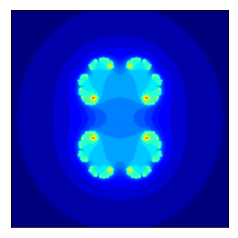

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


{'winter', 'coolwarm', 'cool', 'seismic', 'rainbow', 'brg', 'Spectral', 'Reds', 'jet', 'pink', 'bone', 'summer', 'Greens', 'twilight', 'Greys', 'hsv', 'Purples', 'bwr', 'Wistia'}


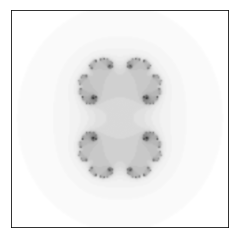

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


{'winter', 'coolwarm', 'summer', 'hsv', 'cool', 'seismic', 'rainbow', 'brg', 'Spectral', 'twilight', 'pink', 'Greys'}


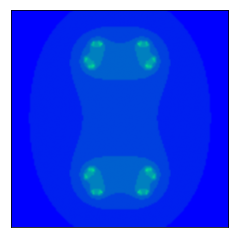

{'bone', 'spring', 'seismic', 'cool', 'Wistia', 'autumn', 'Spectral'}


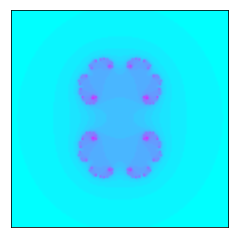

336 336 336 336


In [7]:
anim_count = 0
nFrames1 = generate_animation(noteDurations=sopDurations, notePitches=sopPitches)
nFrames2 = generate_animation(noteDurations=altDurations, notePitches=altPitches)
nFrames3 = generate_animation(noteDurations=tenDurations, notePitches=tenPitches)
nFrames4 = generate_animation(noteDurations=basDurations, notePitches=basPitches)
print(nFrames1, nFrames2, nFrames3, nFrames4)

In [8]:
import imageio 

#Create reader object for the gif
gif1 = imageio.get_reader('julia_0.gif')
gif2 = imageio.get_reader('julia_1.gif')
gif3 = imageio.get_reader('julia_2.gif')
gif4 = imageio.get_reader('julia_3.gif')

#Create writer object
new_gif = imageio.get_writer('counterpoint.gif')

for frame_number in range(nFrames1):
    img1 = gif1.get_next_data()
    img2 = gif2.get_next_data()
    img3 = gif3.get_next_data()
    img4 = gif4.get_next_data()
    
    new_image = np.hstack((img1, img2))
    new_image2 = np.hstack((img3, img4))
    final = np.vstack((new_image, new_image2))
    new_gif.append_data(final)

gif1.close()
gif2.close()    
gif3.close()
gif4.close()
new_gif.close()